In [ ]:
#  COVID-19 Global Data Tracker

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
%matplotlib inline
sns.set(style="darkgrid")

In [3]:
data_path = '../data/owid-covid-data.csv'
df = pd.read_csv(data_path)

In [4]:
print("Data Shape:", df.shape)
df.head()

Data Shape: (350085, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
countries = ['United Kingdom', 'India', 'United States']
df = df[df['location'].isin(countries)]

In [7]:
df = df.dropna(subset=['date', 'total_cases'])

In [8]:
df[['total_cases', 'total_deaths', 'total_vaccinations']] = df[
    ['total_cases', 'total_deaths', 'total_vaccinations']
].interpolate()

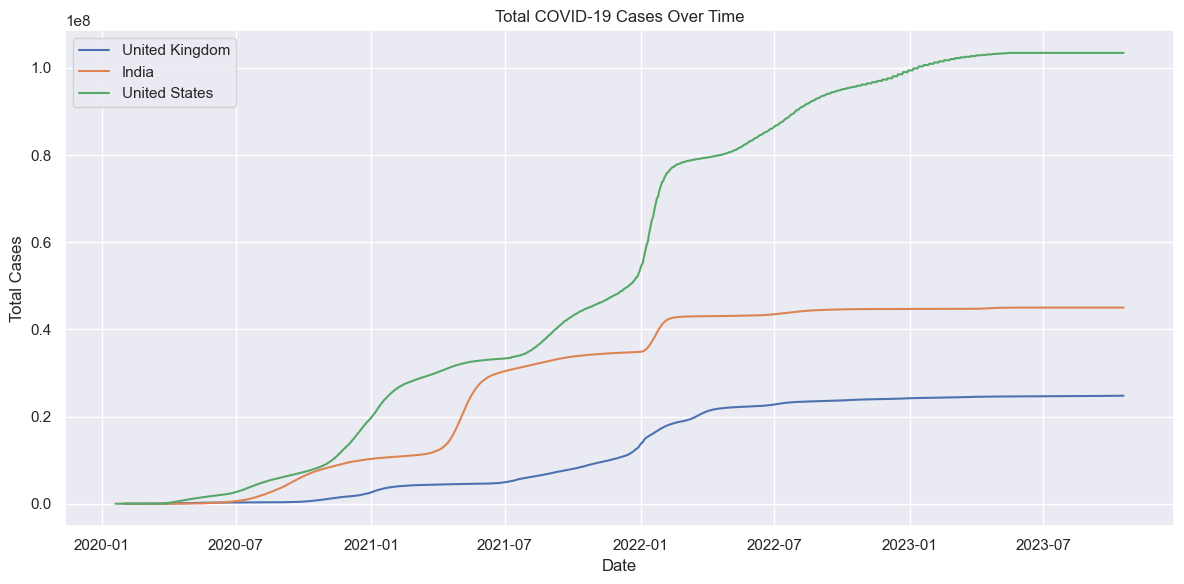

In [10]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/charts/total_cases_over_time.png')
plt.show()

In [11]:
df['death_rate'] = df['total_deaths'] / df['total_cases']

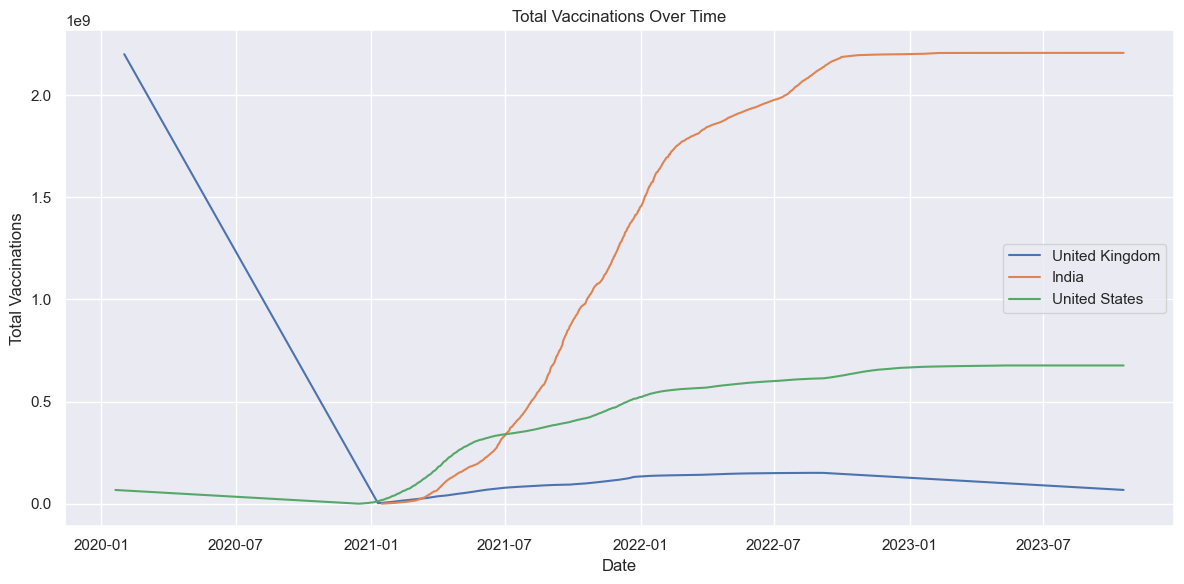

In [12]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/charts/total_vaccinations.png')
plt.show()

In [13]:
print("🔹 United States had one of the highest number of total cases.")
print("🔹 India had the highest vaccination numbers.")
print("🔹 United Kingdom had the lowest total cases over time.")

🔹 United States had one of the highest number of total cases.
🔹 India had the highest vaccination numbers.
🔹 United Kingdom had the lowest total cases over time.
